In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv("train.csv")
df_songs = pd.read_csv("songs.csv")
df_songs_extra = pd.read_csv("song_extra_info.csv")
df_members = pd.read_csv("members.csv",parse_dates=["registration_init_time","expiration_date"]) # here data and time will set
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
df_songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [5]:
df_songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [6]:
df_members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


## Compare the Common , Symmetric difference and Unique MSNO Id  in Train and  Members data set

In [7]:
print("Number of common MSNO id in both the datasets  - Train and Members : " ,len(set.intersection(set(df_train['msno']), set(df_members['msno']))))
print("Number of symmetric differene MSNO id in betwween the datasets  - Train and Members: ",len(set.symmetric_difference(set(df_train['msno']), set(df_members['msno']))))
print("No of Unique MSNO id  in Training set :", df_train['msno'].nunique())
print("No of Unique MSNO id  in Members set :", df_members['msno'].nunique())
print("Shape of Training set:", df_train.shape)
print("Shape of Members set:", df_members.shape)

Number of common MSNO id in both the datasets  - Train and Members :  30755
Number of symmetric differene MSNO id in betwween the datasets  - Train and Members:  3648
No of Unique MSNO id  in Training set : 30755
No of Unique MSNO id  in Members set : 34403
Shape of Training set: (7377418, 6)
Shape of Members set: (34403, 7)


## Compare the Common,Symmetric difference and Unique Songs Id in Train and Songs data set

In [8]:
print("Number of Common Songs id in both the datasets - Train and Songs : ", len(set.intersection(set(df_train['song_id']), set(df_songs['song_id']))))
print("Number of symmetric differene Songs id in between the datasets  - Train and Songs: ",len(set.symmetric_difference(set(df_train['song_id']), set(df_songs['song_id']))))
print("No of Unique songs id in Training set :", df_train['song_id'].nunique())
print("No of Unique songs id  in Songs set :" ,df_songs['song_id'].nunique())
print("Shape of Training set:", df_train.shape)
print("Shape of Songs set:", df_songs.shape)

Number of Common Songs id in both the datasets - Train and Songs :  359914
Number of symmetric differene Songs id in between the datasets  - Train and Songs:  1936458
No of Unique songs id in Training set : 359966
No of Unique songs id  in Songs set : 2296320
Shape of Training set: (7377418, 6)
Shape of Songs set: (2296320, 7)


## Compare the Common , Symmetric difference and Unique MSNO Id  in Test and Members  data set

In [9]:
print("Number of common MSNO id in both the datasets - Test and Members : " ,len(set.intersection(set(df_test['msno']), set(df_members['msno']))))
print("Number of symmetric differene Songs id in between the datasets  - Train and Members: ",len(set.symmetric_difference(set(df_test['msno']), set(df_members['msno']))))
print("No of Unique MSNO id  in Training set :", df_test['msno'].nunique())
print("No of Unique MSNO id  in Members set :", df_members['msno'].nunique())
print("Shape of Training set:", df_train.shape)
print("Shape of Members set:", df_members.shape)

Number of common MSNO id in both the datasets - Test and Members :  25131
Number of symmetric differene Songs id in between the datasets  - Train and Members:  9272
No of Unique MSNO id  in Training set : 25131
No of Unique MSNO id  in Members set : 34403
Shape of Training set: (7377418, 6)
Shape of Members set: (34403, 7)


## Compare the Common, Symmetric difference and Unique Song Id in Test and Songs data set

In [10]:
print("Number of Common Songs id  in both the datasets - Test and Songs : ", len(set.intersection(set(df_test['song_id']), set(df_songs['song_id']))))
print("Number of symmetric differene Songs id in between the datasets  - Test and Songs: ",len(set.symmetric_difference(set(df_test['song_id']), set(df_songs['song_id']))))
print("No of Unique songs id  in Test set :", df_test['song_id'].nunique())
print("No of Unique songs id in Songs set :" ,df_songs['song_id'].nunique())
print("Shape of Test set:", df_train.shape)
print("Shape of Songs set:", df_songs.shape)

Number of Common Songs id  in both the datasets - Test and Songs :  224739
Number of symmetric differene Songs id in between the datasets  - Test and Songs:  2071595
No of Unique songs id  in Test set : 224753
No of Unique songs id in Songs set : 2296320
Shape of Test set: (7377418, 6)
Shape of Songs set: (2296320, 7)


## Compare the Common and Unique Song Id in Songs and song_extra_info data set

In [11]:
print("Number of Common Songs id  in both the datasets - Songs and song_extra_info : ", len(set.intersection(set(df_songs['song_id']), set(df_songs_extra['song_id']))))
print("Number of symmetric differene Songs id in between the datasets  - Songs and song_extra_info: ",len(set.symmetric_difference(set(df_songs['song_id']), set(df_songs_extra['song_id']))))
print("No of Unique songs id  in Songs set :", df_songs['song_id'].nunique())
print("No of Unique songs id in Song_extra set :" ,df_songs_extra['song_id'].nunique())
print("Shape of Songs set:", df_songs.shape)
print("Shape of Songs_extra set:", df_songs_extra.shape)

Number of Common Songs id  in both the datasets - Songs and song_extra_info :  2295422
Number of symmetric differene Songs id in between the datasets  - Songs and song_extra_info:  1447
No of Unique songs id  in Songs set : 2296320
No of Unique songs id in Song_extra set : 2295971
Shape of Songs set: (2296320, 7)
Shape of Songs_extra set: (2295971, 3)


### Merge the Songs data set with Song_extra_info data sets

In [12]:
df_songs =df_songs.merge(df_songs_extra,how="left",on="song_id")

In [13]:
df_songs.head(2)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,焚情,TWB531410010
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,PLAYING WITH FIRE,NaN


### Merge the Train data set with Members data set and Songs data sets

In [14]:
df_trainMerge=df_train.merge(df_songs,how="left",on="song_id")
df_trainMerge=df_trainMerge.merge(df_members,how="left",on="msno")

In [15]:
df_trainMerge.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,2012-01-02,2017-10-05
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,2011-05-25,2017-09-11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,2011-05-25,2017-09-11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,2011-05-25,2017-09-11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,2012-01-02,2017-10-05


In [16]:
df_trainMerge.shape

(7377418, 20)

In [17]:
df_trainMerge.isnull().sum()

msno                            0
song_id                         0
source_system_tab           24849
source_screen_name         414804
source_type                 21539
target                          0
song_length                   114
genre_ids                  118455
artist_name                   114
composer                  1675706
lyricist                  3178798
language                      150
name                         1571
isrc                       577963
city                            0
bd                              0
gender                    2961479
registered_via                  0
registration_init_time          0
expiration_date                 0
dtype: int64

In [18]:
df_trainMerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7377418 entries, 0 to 7377417
Data columns (total 20 columns):
msno                      object
song_id                   object
source_system_tab         object
source_screen_name        object
source_type               object
target                    int64
song_length               float64
genre_ids                 object
artist_name               object
composer                  object
lyricist                  object
language                  float64
name                      object
isrc                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(12)
memory usage: 1.2+ GB


##  bd: age

In [19]:
df_trainMerge["bd"].value_counts().head(5)

0     2940499
25     261906
24     258688
26     257869
22     255731
Name: bd, dtype: int64

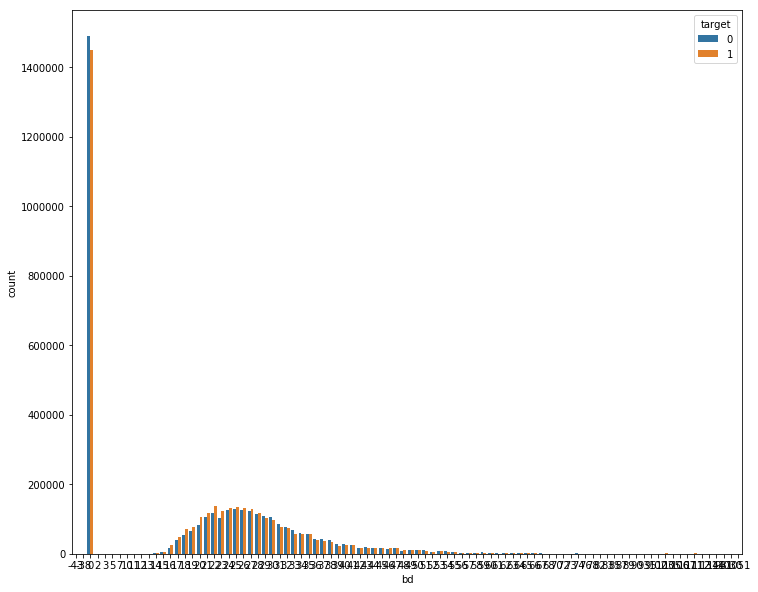

In [20]:
#well looks like a lot of people are yet to be born but have started listening to music 
plt.figure(figsize=(12,10))
sns.countplot(df_trainMerge['bd'],hue=df_trainMerge['target'])

In [21]:
# Almost 40% have an age 0. see below
df_len = len(df_trainMerge)
for lang_id,count in zip(df_trainMerge['bd'].value_counts().index,df_trainMerge['bd'].value_counts()):
    print(lang_id,":",(100*count / df_len))

0 : 39.85810482746132
25 : 3.5501038439193766
24 : 3.5064842469275836
26 : 3.495382801950493
22 : 3.466402473060358
27 : 3.430265168653857
28 : 3.152159739355964
23 : 3.0939686486518725
21 : 3.010362161937957
29 : 2.8626817675235428
30 : 2.7537683238227793
20 : 2.5678225091759748
31 : 2.1937756543007323
32 : 2.054160412220102
19 : 1.9121324018782724
33 : 1.7276369591637617
18 : 1.6925704901091412
34 : 1.5632027356996716
35 : 1.5253168520476947
17 : 1.1808874053225669
36 : 1.1200666683113252
37 : 1.0806219737040792
38 : 1.018865950119676
40 : 0.7358129903985378
39 : 0.7140167467805132
41 : 0.6964225153027793
16 : 0.5715278705910387
43 : 0.4785007437561488
44 : 0.45465771357946644
45 : 0.43279369557208225
42 : 0.42962185415005627
47 : 0.4228444152141034
46 : 0.41545700677391467
50 : 0.2929615754455014
49 : 0.2828225267973158
48 : 0.2647538745940653
51 : 0.25168697232554804
54 : 0.19481070477503104
53 : 0.1933061133312495
52 : 0.17046614411708813
55 : 0.14965940658371263
15 : 0.1342068458

In [22]:
# age is less than or equal zero
len(df_trainMerge.query("bd< = 0"))

2940694

In [23]:
# age is less than or equal zero
len(df_trainMerge.query("bd > =100"))

6508

2940694 of people aged less than 0 . We can delete them since the count is very small .
6508 people are aged above 100 . Lets see how to deal with them .
lets create a temporary dataframe of genuine ages and do some analysis on them first .

In [24]:
df_trainMergeTemp = df_trainMerge.query("bd >=5 and bd < 100")

In [25]:
df_trainMergeTemp['bd'].describe()

count    4.429386e+06
mean     2.872689e+01
std      8.627730e+00
min      5.000000e+00
25%      2.300000e+01
50%      2.700000e+01
75%      3.300000e+01
max      9.500000e+01
Name: bd, dtype: float64

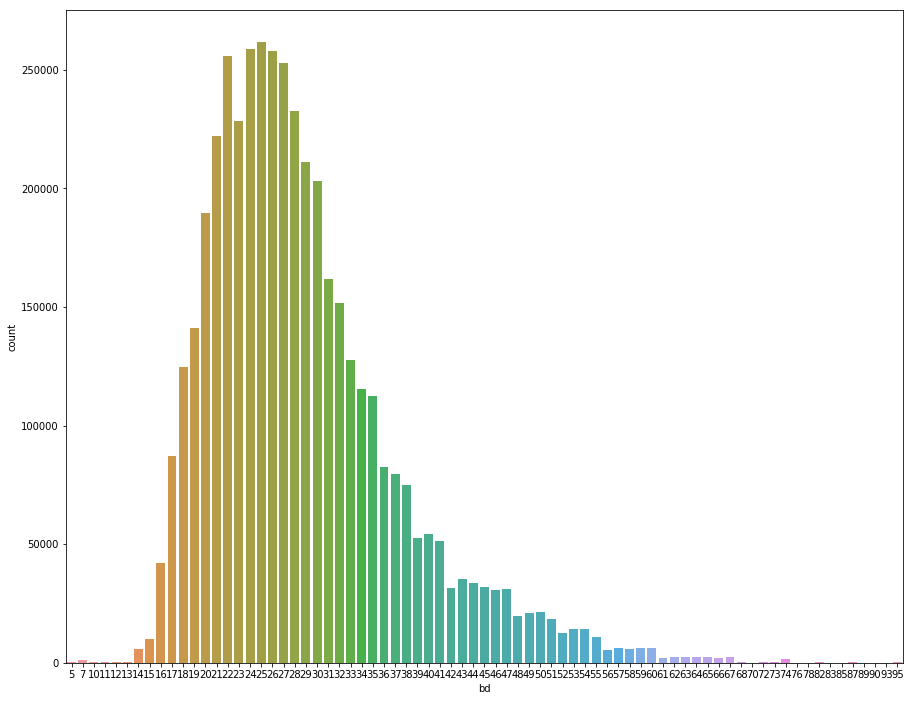

In [26]:
plt.figure(figsize=(15,12))
sns.countplot(df_trainMergeTemp['bd'])

Lets bin the ages into the ranges (5-10,10-18,18-40,40-60,60-80,80-100) year

In [27]:
df_trainMergeTemp['age_range'] = pd.cut(df_trainMergeTemp['bd'],bins=[5,10,18,30,45,60,80])

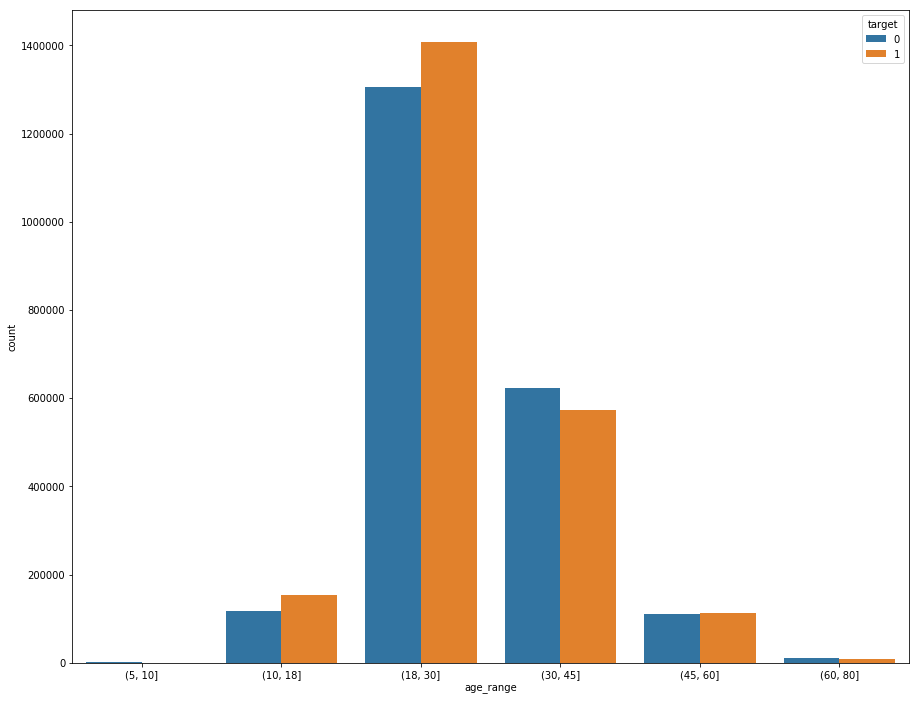

In [28]:
plt.figure(figsize=(15,12))
sns.countplot(df_trainMergeTemp['age_range'],hue=df_trainMergeTemp['target'])

In [29]:
df_trainMergeTemp.shape

(4429386, 21)

In [30]:
df_trainMergeTemp.isnull().sum()

msno                            0
song_id                         0
source_system_tab           16841
source_screen_name         229405
source_type                 13748
target                          0
song_length                    74
genre_ids                   70927
artist_name                    74
composer                   992863
lyricist                  1884393
language                       97
name                          910
isrc                       329498
city                            0
bd                              0
gender                     148255
registered_via                  0
registration_init_time          0
expiration_date                 0
age_range                    1284
dtype: int64

In [31]:
df_trainMergeTemp.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,age_range
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,...,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,2011-05-25,2017-09-11,"(18, 30]"
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,2011-05-25,2017-09-11,"(18, 30]"
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,2011-05-25,2017-09-11,"(18, 30]"
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,...,31.0,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512,13,24,female,9,2011-05-25,2017-09-11,"(18, 30]"
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1,278964.0,2022,OneRepublic,Ryan Tedder,...,52.0,Dreaming Out Loud,USUM70759544,15,26,male,9,2011-11-07,2018-03-04,"(18, 30]"


## Gender

In [32]:
#df_trainMergeTemp['gender'] = df_trainMergeTemp['gender'].apply(na_randomfill)

def impute_nan_create_category(DataFrame,ColName):
     DataFrame[ColName] = np.where(DataFrame[ColName].isnull(),"Unknown",DataFrame[ColName])
## Call function to create new category for variables
for Columns in ['gender']:
    impute_nan_create_category(df_trainMergeTemp,Columns)

In [33]:
print(df_trainMergeTemp["gender"].isnull().sum())
print(df_trainMergeTemp["gender"].value_counts())

0
male       2241394
female     2039737
Unknown     148255
Name: gender, dtype: int64


In [34]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df_trainMergeTemp["gender"] = labelEncoder.fit_transform(df_trainMergeTemp["gender"])

In [35]:
df_trainMergeTemp.isnull().sum()

msno                            0
song_id                         0
source_system_tab           16841
source_screen_name         229405
source_type                 13748
target                          0
song_length                    74
genre_ids                   70927
artist_name                    74
composer                   992863
lyricist                  1884393
language                       97
name                          910
isrc                       329498
city                            0
bd                              0
gender                          0
registered_via                  0
registration_init_time          0
expiration_date                 0
age_range                    1284
dtype: int64

## Language

In [36]:
df_trainMergeTemp['language'].value_counts()

 3.0     2485198
 52.0    1109815
 31.0     380580
-1.0      175561
 17.0     138306
 10.0      89139
 24.0      47182
 59.0       2304
 45.0       1090
 38.0        114
Name: language, dtype: int64

Replacing -1 with 1 .

In [37]:
df_trainMergeTemp = df_trainMergeTemp.replace(to_replace =-1,value =1)

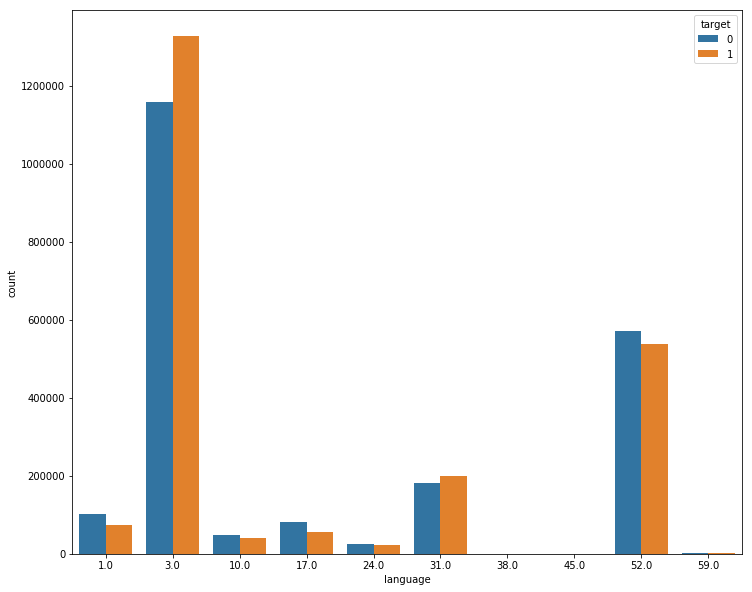

In [38]:
plt.figure(figsize=(12,10))
sns.countplot(df_trainMergeTemp['language'],hue=df_trainMergeTemp['target'])

Language with code 3.0 seems taiwaneese (after a bit of googling ) 52.0 is of course english 31.0 is Korean .

The above 3 languages make up for most of the data

In [39]:
df_len = len(df_trainMergeTemp)
for lang_id,count in zip(df_trainMergeTemp['language'].value_counts().index,df_trainMergeTemp['language'].value_counts()) : 
    print(lang_id,":",(100*count / df_len))

3.0 : 56.1070541154011
52.0 : 25.055730071842916
31.0 : 8.592161532094968
1.0 : 3.9635516073785397
17.0 : 3.122464377681241
10.0 : 2.012445968809221
24.0 : 1.0652040711737474
59.0 : 0.05201623881955648
45.0 : 0.024608376872099203
38.0 : 0.0025737201499259716


As we can clearly see above , the first 3 languages make up for 90% of the data , languages being Taiwanees ,English and Korean

In [40]:
#df = df_trainMergeTemp["language"].fillna(value='missing', method='bfill', limit=1) 
df_trainMergeTemp["language"] = df_trainMergeTemp["language"].fillna(method='ffill')

In [41]:
df_trainMergeTemp["language"].isnull().sum()

0

In [42]:
df_trainMergeTemp.isnull().sum()

msno                            0
song_id                         0
source_system_tab           16841
source_screen_name         229405
source_type                 13748
target                          0
song_length                    74
genre_ids                   70927
artist_name                    74
composer                   992863
lyricist                  1884393
language                        0
name                          910
isrc                       329498
city                            0
bd                              0
gender                          0
registered_via                  0
registration_init_time          0
expiration_date                 0
age_range                    1284
dtype: int64

## Source Type

In [43]:
df_len = len(df_trainMergeTemp)
for lang_id,count in zip(df_trainMergeTemp['source_type'].value_counts().index,df_trainMergeTemp['source_type'].value_counts()):
    print(lang_id,":",(100*count / df_len))

local-library : 30.555183043428592
online-playlist : 25.08516981811926
local-playlist : 17.143956295522674
radio : 6.456131843104213
album : 5.979632391487217
top-hits-for-artist : 5.52844118801116
listen-with : 3.068890360876203
song : 3.0278688739251898
song-based-playlist : 2.632599642478664
topic-article-playlist : 0.1693462705666203
artist : 0.03876383769669205
my-daily-playlist : 0.0036348152994568547


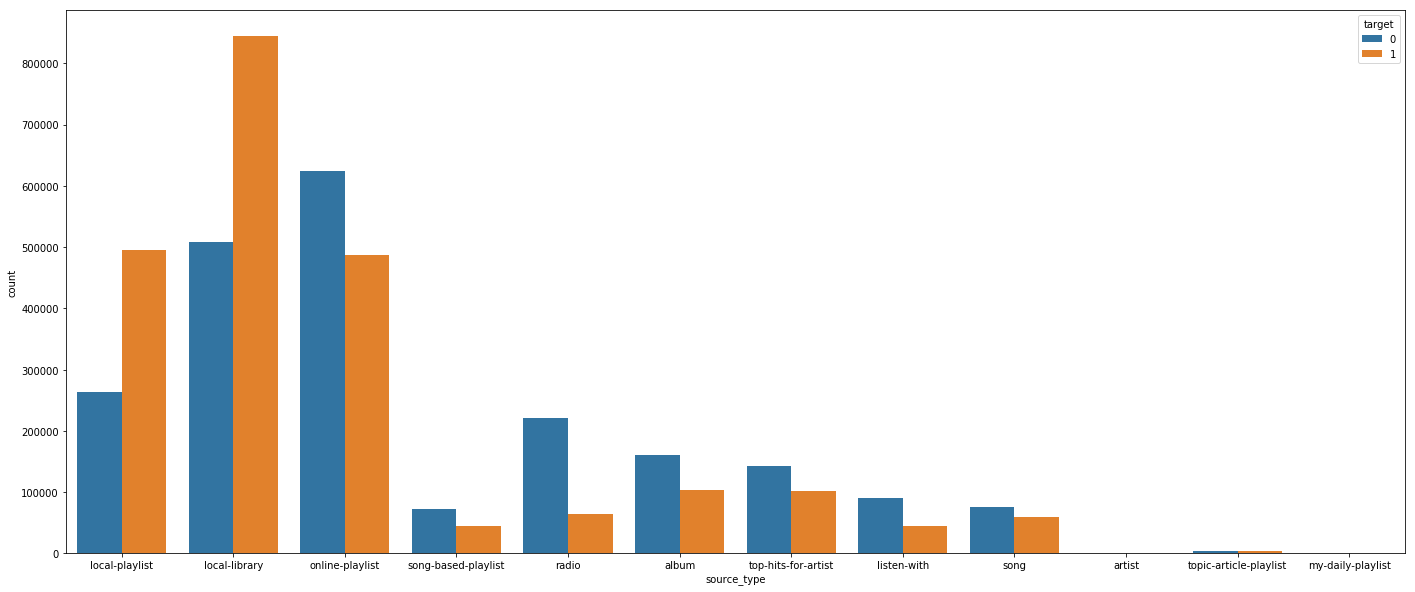

In [44]:
plt.figure(figsize=(24,10))
sns.countplot(df_trainMergeTemp['source_type'],hue=df_trainMergeTemp['target'])

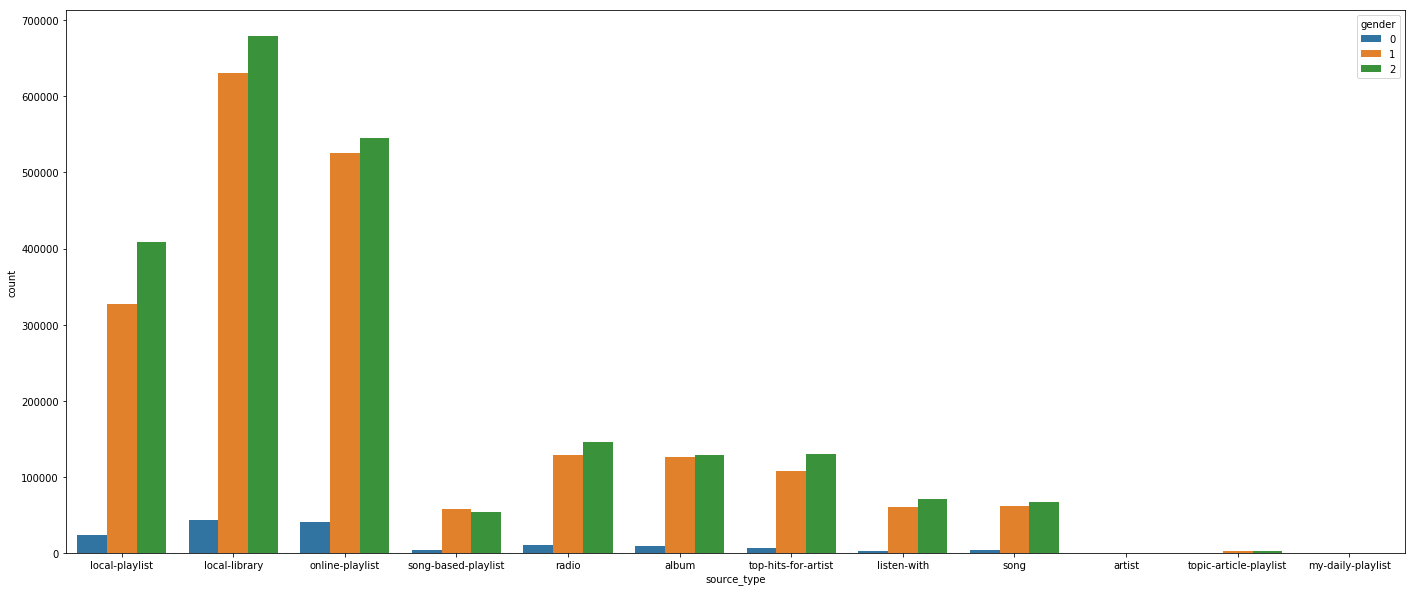

In [45]:
plt.figure(figsize=(24,10))
sns.countplot(df_trainMergeTemp['source_type'],hue=df_trainMergeTemp['gender'])

As we can clearly see above , the first 5 source_type make up for 90% of the data 

In [46]:
df_trainMergeTemp["source_type"] = df_trainMergeTemp["source_type"].fillna(method='ffill')

In [47]:
df_len = len(df_trainMergeTemp)
for lang_id,count in zip(df_trainMergeTemp['source_type'].value_counts().index,df_trainMergeTemp['source_type'].value_counts()):
    print(lang_id,":",(100*count / df_len))

local-library : 30.659418709500596
online-playlist : 25.162471728587214
local-playlist : 17.202339105239417
radio : 6.4683683020626335
album : 5.998416033283168
top-hits-for-artist : 5.540587340999407
listen-with : 3.0767469802812397
song : 3.0398795679581774
song-based-playlist : 2.6394177432267134
topic-article-playlist : 0.1697978004174845
artist : 0.038921873144494516
my-daily-playlist : 0.0036348152994568547


In [48]:
df_trainMergeTemp.head(5)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,age_range
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,...,52.0,Lords of Cardboard,US3C69910183,13,24,1,9,2011-05-25,2017-09-11,"(18, 30]"
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,1,9,2011-05-25,2017-09-11,"(18, 30]"
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,1.0,Disco Africa,GBUQH1000063,13,24,1,9,2011-05-25,2017-09-11,"(18, 30]"
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,...,31.0,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512,13,24,1,9,2011-05-25,2017-09-11,"(18, 30]"
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1,278964.0,2022,OneRepublic,Ryan Tedder,...,52.0,Dreaming Out Loud,USUM70759544,15,26,2,9,2011-11-07,2018-03-04,"(18, 30]"


In [49]:
df_trainMergeTemp["source_type"].value_counts()

local-library             1358024
online-playlist           1114543
local-playlist             761958
radio                      286509
album                      265693
top-hits-for-artist        245414
listen-with                136281
song                       134648
song-based-playlist        116910
topic-article-playlist       7521
artist                       1724
my-daily-playlist             161
Name: source_type, dtype: int64

In [50]:
df_trainMergeTemp["source_type"].dtypes

dtype('O')

In [51]:
df_trainMergeTemp["source_type"] = labelEncoder.fit_transform(df_trainMergeTemp["source_type"] )

## Source Length

In [52]:
df_trainMergeTemp["song_length"].isnull().sum()

74

In [53]:
df_trainMergeTemp["song_length"]= df_trainMergeTemp["song_length"].fillna(df_trainMergeTemp["song_length"].mean())

In [54]:
df_trainMergeTemp["song_length"].isnull().sum()

0

In [55]:
df_New= df_trainMergeTemp.drop(['source_system_tab','source_screen_name','artist_name','composer','lyricist','isrc','name','genre_ids','age_range'],axis =1)

In [56]:
df_New.head()

,msno,song_id,source_type,target,song_length,language,city,bd,gender,registered_via,registration_init_time,expiration_date
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,4,1,284584.0,52.0,13,24,1,9,2011-05-25,2017-09-11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,4,1,225396.0,52.0,13,24,1,9,2011-05-25,2017-09-11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,4,1,255512.0,1.0,13,24,1,9,2011-05-25,2017-09-11
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,4,1,229982.0,31.0,13,24,1,9,2011-05-25,2017-09-11
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,3,1,278964.0,52.0,15,26,2,9,2011-11-07,2018-03-04


In [57]:
df_New.msno = labelEncoder.fit_transform(df_New.msno)
df_New.song_id = labelEncoder.fit_transform(df_New.song_id)


In [58]:
df_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4429386 entries, 1 to 7377413
Data columns (total 12 columns):
msno                      int64
song_id                   int64
source_type               int64
target                    int64
song_length               float64
language                  float64
city                      int64
bd                        int64
gender                    int64
registered_via            int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(8)
memory usage: 439.3 MB


In [59]:
# registration_init_time
df_New.registration_init_time = pd.to_datetime(df_New.registration_init_time, format='%Y%m%d', errors='ignore')
df_New['registration_init_time_year'] = df_New['registration_init_time'].dt.year
df_New['registration_init_time_month'] = df_New['registration_init_time'].dt.month
df_New['registration_init_time_day'] = df_New['registration_init_time'].dt.day

# expiration_date
df_New.expiration_date = pd.to_datetime(df_New.expiration_date,  format='%Y%m%d', errors='ignore')
df_New['expiration_date_year'] = df_New['expiration_date'].dt.year
df_New['expiration_date_month'] = df_New['expiration_date'].dt.month
df_New['expiration_date_day'] = df_New['expiration_date'].dt.day

In [60]:
df_New= df_New.drop(['registration_init_time','expiration_date',],axis=1)

In [61]:
df_New.head()

,msno,song_id,source_type,target,song_length,language,city,bd,gender,registered_via,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
1,7604,173476,4,1,284584.0,52.0,13,24,1,9,2011,5,25,2017,9,11
2,7604,93819,4,1,225396.0,52.0,13,24,1,9,2011,5,25,2017,9,11
3,7604,18522,4,1,255512.0,1.0,13,24,1,9,2011,5,25,2017,9,11
6,7604,147379,4,1,229982.0,31.0,13,24,1,9,2011,5,25,2017,9,11
8,12445,7171,3,1,278964.0,52.0,15,26,2,9,2011,11,7,2018,3,4


In [62]:
y = df_New["target"]
X = df_New.drop(['target'],axis=1)

In [63]:
y.head(2)

1    1
2    1
Name: target, dtype: int64

In [64]:
X.head(2)

,msno,song_id,source_type,song_length,language,city,bd,gender,registered_via,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
1,7604,173476,4,284584.0,52.0,13,24,1,9,2011,5,25,2017,9,11
2,7604,93819,4,225396.0,52.0,13,24,1,9,2011,5,25,2017,9,11


In [65]:
X.describe()

,msno,song_id,source_type,song_length,language,city,bd,gender,registered_via,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
count,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06,4.429386e+06
mean,6.816413e+03,1.392470e+05,4.685991e+00,2.452804e+05,1.844644e+01,1.078496e+01,2.872689e+01,1.472557e+00,6.940222e+00,2.011797e+03,6.764237e+00,1.587335e+01,2.017129e+03,8.245797e+00,1.585665e+01
std,3.946994e+03,8.048718e+04,2.394800e+00,6.503208e+04,2.108177e+01,5.860560e+00,8.627730e+00,5.623064e-01,2.576407e+00,3.206137e+00,3.595583e+00,8.779509e+00,4.167263e-01,2.610895e+00,9.149411e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.393000e+03,1.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,3.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,2.005000e+03,1.000000e+00,1.000000e+00
25%,3.418000e+03,6.915000e+04,3.000000e+00,2.151440e+05,3.000000e+00,5.000000e+00,2.300000e+01,1.000000e+00,4.000000e+00,2.010000e+03,3.000000e+00,8.000000e+00,2.017000e+03,8.000000e+00,8.000000e+00
50%,6.823000e+03,1.386530e+05,4.000000e+00,2.422070e+05,3.000000e+00,1.300000e+01,2.700000e+01,2.000000e+00,9.000000e+00,2.012000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00,1.600000e+01
75%,1.024500e+04,2.078440e+05,6.000000e+00,2.723000e+05,5.200000e+01,1.400000e+01,3.300000e+01,2.000000e+00,9.000000e+00,2.014000e+03,1.000000e+01,2.400000e+01,2.017000e+03,1.000000e+01,2.400000e+01
max,1.362300e+04,2.793220e+05,1.100000e+01,1.085171e+07,5.900000e+01,2.200000e+01,9.500000e+01,2.000000e+00,1.300000e+01,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01,3.100000e+01


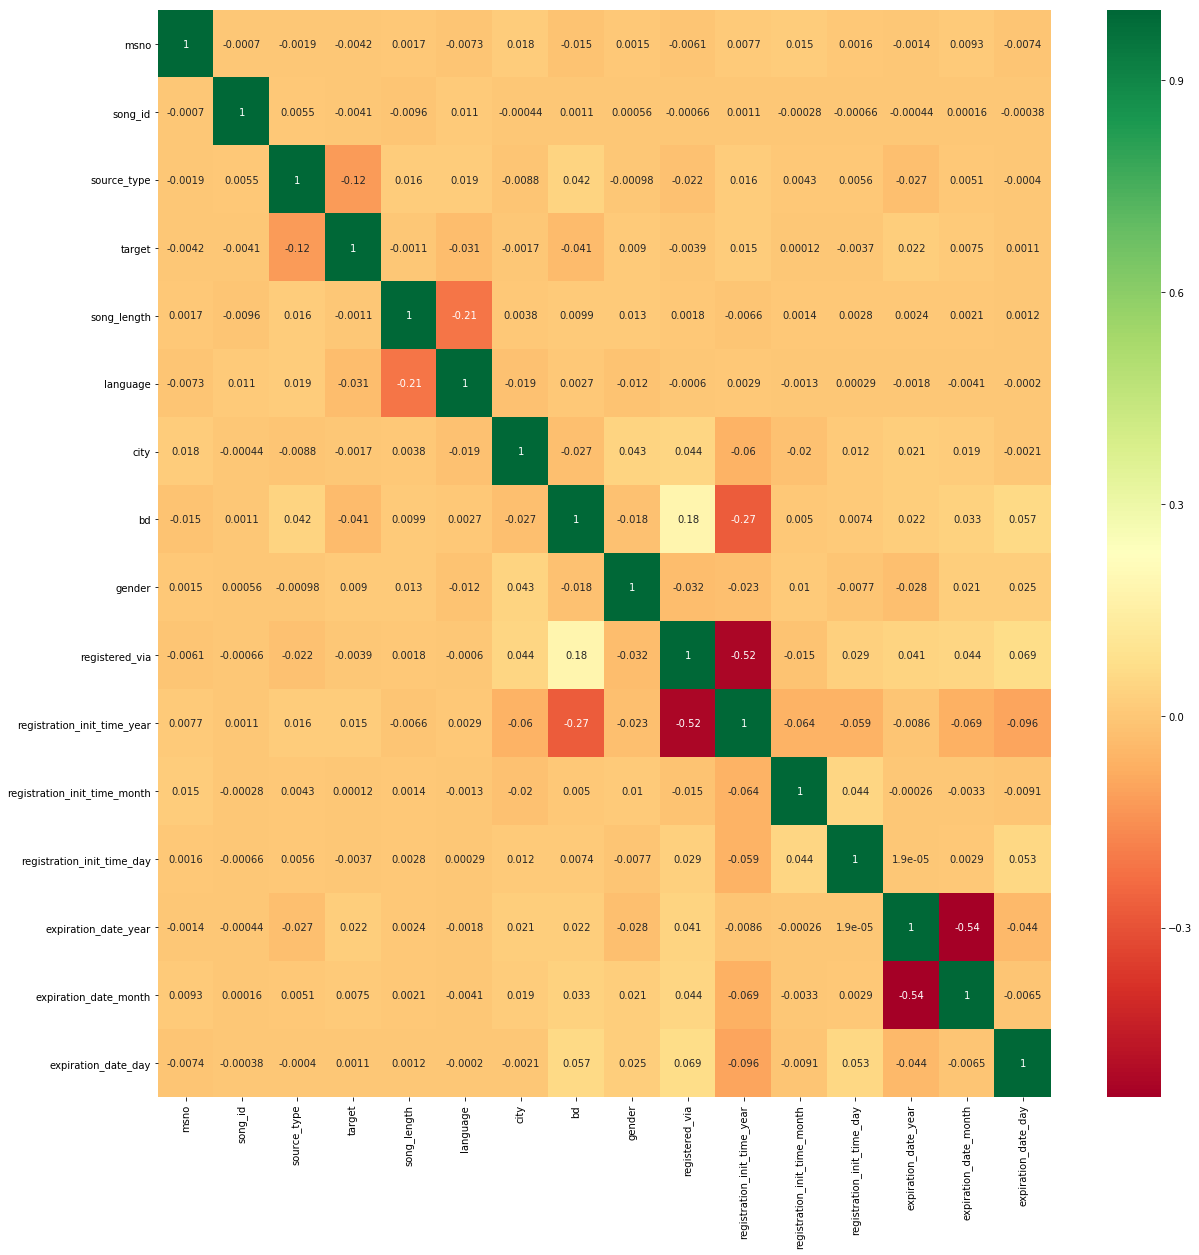

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_New.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_New[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [67]:
df_New.corr()

,msno,song_id,source_type,target,song_length,language,city,bd,gender,registered_via,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
msno,1.000000,-0.000698,-0.001860,-0.004243,0.001731,-0.007280,0.018196,-0.015432,0.001496,-0.006117,0.007650,0.014901,0.001611,-0.001386,0.009282,-0.007389
song_id,-0.000698,1.000000,0.005464,-0.004125,-0.009593,0.011298,-0.000440,0.001145,0.000558,-0.000662,0.001127,-0.000276,-0.000659,-0.000444,0.000162,-0.000382
source_type,-0.001860,0.005464,1.000000,-0.118960,0.016213,0.018901,-0.008777,0.041643,-0.000982,-0.021770,0.015938,0.004291,0.005577,-0.026727,0.005070,-0.000402
target,-0.004243,-0.004125,-0.118960,1.000000,-0.001122,-0.031256,-0.001715,-0.040501,0.008968,-0.003904,0.015464,0.000117,-0.003750,0.021530,0.007516,0.001149
song_length,0.001731,-0.009593,0.016213,-0.001122,1.000000,-0.213309,0.003839,0.009881,0.012781,0.001772,-0.006600,0.001447,0.002798,0.002428,0.002120,0.001246
language,-0.007280,0.011298,0.018901,-0.031256,-0.213309,1.000000,-0.019250,0.002688,-0.011923,-0.000605,0.002851,-0.001341,0.000286,-0.001763,-0.004060,-0.000201
city,0.018196,-0.000440,-0.008777,-0.001715,0.003839,-0.019250,1.000000,-0.026617,0.042738,0.044006,-0.059599,-0.020141,0.012177,0.021052,0.019231,-0.002086
bd,-0.015432,0.001145,0.041643,-0.040501,0.009881,0.002688,-0.026617,1.000000,-0.017585,0.175953,-0.271339,0.004970,0.007449,0.022316,0.033128,0.056521
gender,0.001496,0.000558,-0.000982,0.008968,0.012781,-0.011923,0.042738,-0.017585,1.000000,-0.031664,-0.023151,0.010019,-0.007711,-0.027810,0.020968,0.025278
registered_via,-0.006117,-0.000662,-0.021770,-0.003904,0.001772,-0.000605,0.044006,0.175953,-0.031664,1.000000,-0.521466,-0.015224,0.029495,0.040525,0.044223,0.068986


In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=9)
fit = bestfeatures.fit(X,y)

In [69]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [70]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [71]:
featureScores

,Specs,Score
0,msno,1.822079e+05
1,song_id,3.506984e+06
2,source_type,7.671578e+04
3,song_length,9.613947e+04
4,language,1.042579e+05
5,city,4.147248e+01
6,bd,1.882658e+04
7,gender,7.648462e+01
8,registered_via,6.457467e+01
9,registration_init_time_year,5.412053e+00


In [72]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                         Specs         Score
1                      song_id  3.506984e+06
0                         msno  1.822079e+05
4                     language  1.042579e+05
3                  song_length  9.613947e+04
2                  source_type  7.671578e+04
6                           bd  1.882658e+04
11  registration_init_time_day  3.024435e+02
13       expiration_date_month  2.068799e+02
7                       gender  7.648462e+01
8               registered_via  6.457467e+01


In [73]:
## Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\rgupta5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

yeehaa pr aap dekhleena kita i greater than hogaa

In [74]:
print(model.feature_importances_)
print(X.columns)#use inbuilt class feature_importances of tree based classifiers
for i in model.feature_importances_:
    if i >= 0.03119358:
        print(i,)

[0.02761989 0.33267355 0.09077536 0.33595927 0.02606006 0.02199868
 0.02630379 0.00806731 0.01030829 0.0215484  0.02351778 0.02624233
 0.00632383 0.01735331 0.02524813]
Index(['msno', 'song_id', 'source_type', 'song_length', 'language', 'city',
       'bd', 'gender', 'registered_via', 'registration_init_time_year',
       'registration_init_time_month', 'registration_init_time_day',
       'expiration_date_year', 'expiration_date_month', 'expiration_date_day'],
      dtype='object')
0.3326735513625668
0.09077536213948272
0.335959270356181


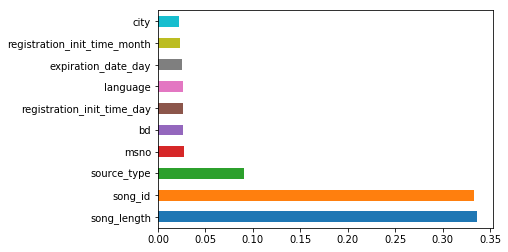

In [75]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances_sorted =feat_importances.sort_values(axis=0, ascending=True)
feat_importances_sorted.nlargest(10).plot(kind='barh')
plt.show()

In [76]:
!pip list 

Package                       Version
----------------------------- -------
backports.functools-lru-cache 1.6.1
click                         7.1.2
cycler                        0.10.0
joblib                        0.14.1
kiwisolver                    1.1.0
matplotlib                    2.2.5
missingno                     0.4.2
numpy                         1.16.6
pandas                        0.24.2
pip                           20.3.3
pyparsing                     2.4.7
PyPDF2                        1.26.0
python-dateutil               2.8.1
pytz                          2020.1
scikit-learn                  0.20.4
scipy                         1.2.3
seaborn                       0.9.1
setuptools                    39.0.1
six                           1.15.0
sklearn                       0.0


DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionality.
You should consider upgrading via the 'c:\python27\python.exe -m pip install --upgrade pip' command.


In [79]:
#Saving to Excel
df_New.to_csv("output.csv") 

In [3]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [8]:
df_New = pd.read_csv("output.csv")

In [9]:
train, test = train_test_split(df_New, test_size = 0.40)
print(train.shape)
print(test.shape)

(2657631, 17)
(1771755, 17)


In [10]:
train_y = train["target"]
train_x = train.drop(['target'],axis=1)



In [11]:
train_x.head()

,Unnamed: 0,msno,song_id,source_type,song_length,language,city,bd,gender,registered_via,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
1343672,2210916,5691,122511,4,262165.0,3.0,5,30,2,3,2012,9,16,2017,9,7
2613161,4309611,6250,37526,3,240744.0,52.0,13,22,2,9,2011,7,15,2017,10,19
686529,1139050,5268,236280,3,202318.0,3.0,1,20,0,9,2014,9,29,2017,11,19
630263,1047381,13325,203234,9,197903.0,3.0,4,23,2,9,2011,2,11,2017,9,30
90978,150395,1960,262995,6,296797.0,17.0,6,23,1,3,2012,10,28,2017,9,16


In [12]:
test_y = test["target"]
test_x = test.drop(['target'],axis=1)

In [13]:
print(train_x.shape)
print(test_x.shape)

(2657631, 16)
(1771755, 16)


In [14]:
print(train_y.shape)
print(test_y.shape)

(2657631,)
(1771755,)


In [15]:
#Using LogisticRegression
model = LogisticRegression()
model.fit(train_x, train_y)
prediction = model.predict(test_x)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

Accuracy: 0.5792239897728524


In [16]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

Confusion matrix: 
 [[473898 394673]
 [350839 552345]]
             precision    recall  f1-score   support

          0       0.57      0.55      0.56    868571
          1       0.58      0.61      0.60    903184

avg / total       0.58      0.58      0.58   1771755



In [18]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=20)
model4.fit(train_x,train_y)
y_pred4 = model4.predict(test_x)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.6908596278830876


In [19]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_x,train_y)
y_pred3 = model3.predict(test_x)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.577426901574992


In [101]:
#from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
#rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
#rf.fit(train_x, train_y);

In [ ]:
# Use the forest's predict method on the test data
#predictions = rf.predict(test_y)
# Calculate the absolute errors
#errors = abs(predictions - test_y)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
#print("Accuracy Score:",accuracy_score(test_y,predictions))

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [20]:


# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

    # Creating a pipeline of three steps. First, standardizing the data.
    # Second, tranforming the data with PCA.
    # Third, training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

    # Creating Parameter Space
    # Creating a list of a sequence of integers from 1 to 30 (th

NameError: name 'tree' is not defined

In [24]:

from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

std_slc = StandardScaler()
# Creating a DecisionTreeClassifier
dec_tree = tree.DecisionTreeClassifier()

    # Creating a pipeline of three steps. First, standardizing the data.
    # Second, tranforming the data with PCA.
    # Third, training a Decision Tree Classifier on the data.
pipe = Pipeline(steps=[('std_slc', std_slc),('dec_tree', dec_tree)])


In [25]:
criterion = ['gini', 'entropy']
max_depth = [6,8,10,12,14,16,18,20,22]
parameters = dict(dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(train_x, train_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('std_slc', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dec_tree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'dec_tree__criterion': ['gini', 'entropy'], 'dec_tree__max_depth': [6, 8, 10, 12, 14, 16, 18, 20, 22]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [27]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
#print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: gini
Best max_depth: 22

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=22,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [30]:
model4 = DecisionTreeClassifier(criterion='gini',random_state=22)
model4.fit(train_x,train_y)
y_pred4 = model4.predict(test_x)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 0.6899097222810151
